# Binary-Classify canonical cruise flight profiles into extended cruises & others

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dashlink/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *
import glob

In [3]:
!pwd

/content


In [4]:
!ls

gdrive	sample_data


In [5]:
# set inference folder
infpath = Path(base_dir + 'Test'); infpath

PosixPath('/content/gdrive/My Drive/dashlink/Test')

In [6]:
# set output folder
outpath = Path('png1'); outpath

PosixPath('png1')

## Setup input for **inference**

In [7]:
# clean input folder
!rm "{infpath}"/{outpath}/*.png

rm: cannot remove '/content/gdrive/My Drive/dashlink/Test/png1/*.png': No such file or directory


In [8]:
#use flight profiles with canonical cruises from inf2, disregard others
! ls -lh "{infpath}"/png2/typ/*.png | wc -l

316


In [0]:
# cp mod2 output to mod1 input
!cp "{infpath}"/png2/typ/*.png "{infpath}"/{outpath}

In [10]:
! ls -lh "{infpath}"/{outpath}/*.png | wc -l

316


In [0]:
#if output dirs do not exist, create it
# (infpath/outpath/'typ').mkdir(parents=True, exist_ok=True)
# (infpath/outpath/'non').mkdir(parents=True, exist_ok=True)

In [28]:
! ls -lh "{infpath}"/{outpath}/non/*.* | wc -l

290


In [29]:
! ls -lh "{infpath}"/{outpath}/typ/*.* | wc -l

26


In [14]:
#remove all output files from outpath/non
! rm "{infpath}"/{outpath}/non/*.png
! ls "{infpath}"/{outpath}/non/*.*

ls: cannot access '/content/gdrive/My Drive/dashlink/Test/png1/non/*.*': No such file or directory


In [15]:
#remove all output files from outpath/typ
! rm "{infpath}"/{outpath}/typ/*.png
! ls "{infpath}"/{outpath}/typ/*.*

ls: cannot access '/content/gdrive/My Drive/dashlink/Test/png1/typ/*.*': No such file or directory


## Inference/Production

In [19]:
# set trained model path (to use for inference)
trnpath = Path(base_dir + 'Train'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Train')

In [20]:
#ensure export.pkl is in png1 folder
!ls -lh "{trnpath}"/{outpath}/export.pkl

-rw------- 1 root root 99M Sep 30 16:49 '/content/gdrive/My Drive/dashlink/Train/png1/export.pkl'


In [0]:
# get trained model to use for inference
learn = load_learner(trnpath/outpath)

In [0]:
from IPython.display import Image, display

In [23]:
# perform inference and move profiles to correct folders
allFiles = glob.glob(str(infpath/outpath/'*.png'))
n = len(allFiles)
print(f'TOTAL FILES TO PROCESS: {n}\n')
for i,file_ in enumerate(allFiles):
#     if i==2: break
        
    img = open_image(file_); #show_image(img)
    pred_class,pred_idx,outputs = learn.predict(img)

    print(file_)
    print('predicted class:', pred_class)
    
    if pred_class.obj=='typ': #useful
        !mv "{file_}" "{infpath}"/{outpath}/typ
    else:                     #non-useful
        !mv "{file_}" "{infpath}"/{outpath}/non
    
    print(f'{i+1} of {n} complete ........................\n')

TOTAL FILES TO PROCESS: 316

/content/gdrive/My Drive/dashlink/Test/png1/687200112312147-1min.png
predicted class: non
1 of 316 complete ........................

/content/gdrive/My Drive/dashlink/Test/png1/687200201010631-1min.png
predicted class: non
2 of 316 complete ........................

/content/gdrive/My Drive/dashlink/Test/png1/687200201010908-1min.png
predicted class: non
3 of 316 complete ........................

/content/gdrive/My Drive/dashlink/Test/png1/687200201011045-1min.png
predicted class: non
4 of 316 complete ........................

/content/gdrive/My Drive/dashlink/Test/png1/687200201011305-1min.png
predicted class: non
5 of 316 complete ........................

/content/gdrive/My Drive/dashlink/Test/png1/687200201011535-1min.png
predicted class: non
6 of 316 complete ........................

/content/gdrive/My Drive/dashlink/Test/png1/687200201011743-1min.png
predicted class: non
7 of 316 complete ........................

/content/gdrive/My Drive/dashlink

## Inspect useful profiles

In [0]:
from IPython.display import Image, display

TOTAL FILES TO SHOW IN typ FOLDER: 26



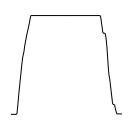

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200201060835-1min.png
1 of 26 complete ........................



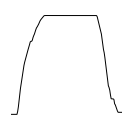

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200201121251-1min.png
2 of 26 complete ........................



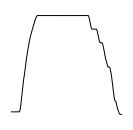

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200201191142-1min.png
3 of 26 complete ........................



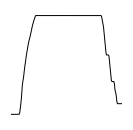

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200201271252-1min.png
4 of 26 complete ........................



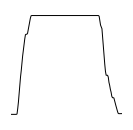

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200202020908-1min.png
5 of 26 complete ........................



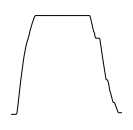

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200202040415-1min.png
6 of 26 complete ........................



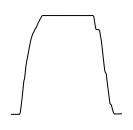

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200202070425-1min.png
7 of 26 complete ........................



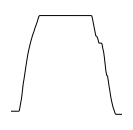

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200202071534-1min.png
8 of 26 complete ........................



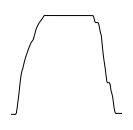

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200202130953-1min.png
9 of 26 complete ........................



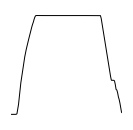

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200202160417-1min.png
10 of 26 complete ........................



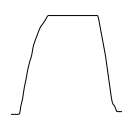

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200203112035-1min.png
11 of 26 complete ........................



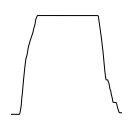

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200203131528-1min.png
12 of 26 complete ........................



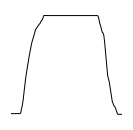

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200203180926-1min.png
13 of 26 complete ........................



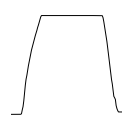

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200203181943-1min.png
14 of 26 complete ........................



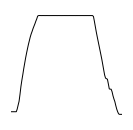

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200203190532-1min.png
15 of 26 complete ........................



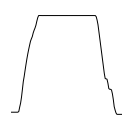

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200203200526-1min.png
16 of 26 complete ........................



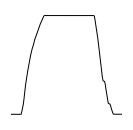

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200203210420-1min.png
17 of 26 complete ........................



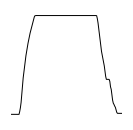

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200203300432-1min.png
18 of 26 complete ........................



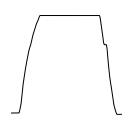

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200205030536-1min.png
19 of 26 complete ........................



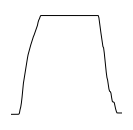

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200205030909-1min.png
20 of 26 complete ........................



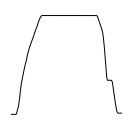

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200205040418-1min.png
21 of 26 complete ........................



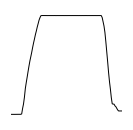

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200205040744-1min.png
22 of 26 complete ........................



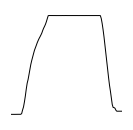

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200205041959-1min.png
23 of 26 complete ........................



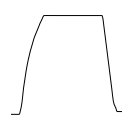

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200205071957-1min.png
24 of 26 complete ........................



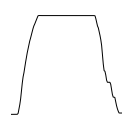

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200205080927-1min.png
25 of 26 complete ........................



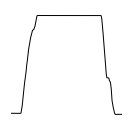

/content/gdrive/My Drive/dashlink/Test/png1/typ/687200205081207-1min.png
26 of 26 complete ........................



In [25]:
# inspect useful profiles
allFiles = glob.glob(str(infpath/outpath/'typ'/'*.png'))
n = len(allFiles)
print(f'TOTAL FILES TO SHOW IN typ FOLDER: {n}\n')
for i,file_ in enumerate(allFiles):
    #if i==5: break
        
    display(Image(filename=file_))
    print(file_)
    
    print(f'{i+1} of {n} complete ........................\n')

## Inspect non-useful profiles

TOTAL FILES TO SHOW IN non FOLDER: 290



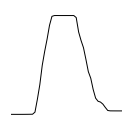

/content/gdrive/My Drive/dashlink/Test/png1/non/687200112312147-1min.png
1 of 290 complete ........................



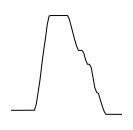

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201010631-1min.png
2 of 290 complete ........................



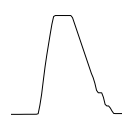

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201010908-1min.png
3 of 290 complete ........................



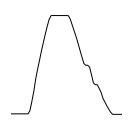

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201011045-1min.png
4 of 290 complete ........................



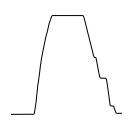

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201011305-1min.png
5 of 290 complete ........................



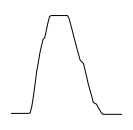

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201011535-1min.png
6 of 290 complete ........................



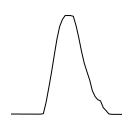

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201011743-1min.png
7 of 290 complete ........................



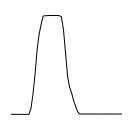

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201020650-1min.png
8 of 290 complete ........................



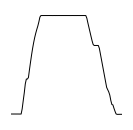

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201020851-1min.png
9 of 290 complete ........................



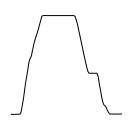

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201021106-1min.png
10 of 290 complete ........................



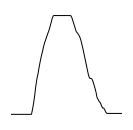

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201021404-1min.png
11 of 290 complete ........................



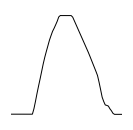

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201021953-1min.png
12 of 290 complete ........................



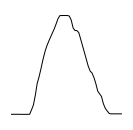

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201031028-1min.png
13 of 290 complete ........................



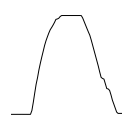

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201040940-1min.png
14 of 290 complete ........................



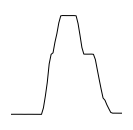

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201041505-1min.png
15 of 290 complete ........................



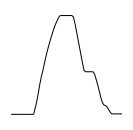

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201041859-1min.png
16 of 290 complete ........................



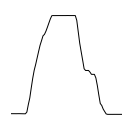

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201050358-1min.png
17 of 290 complete ........................



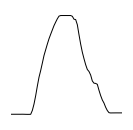

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201061243-1min.png
18 of 290 complete ........................



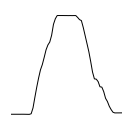

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201071247-1min.png
19 of 290 complete ........................



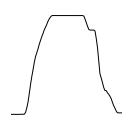

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201071435-1min.png
20 of 290 complete ........................



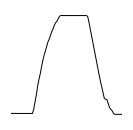

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201071746-1min.png
21 of 290 complete ........................



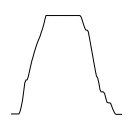

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201080511-1min.png
22 of 290 complete ........................



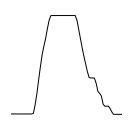

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201080748-1min.png
23 of 290 complete ........................



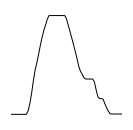

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201080940-1min.png
24 of 290 complete ........................



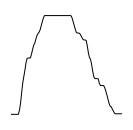

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201090600-1min.png
25 of 290 complete ........................



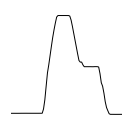

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201090842-1min.png
26 of 290 complete ........................



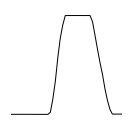

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201091124-1min.png
27 of 290 complete ........................



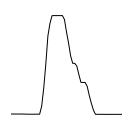

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201091243-1min.png
28 of 290 complete ........................



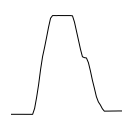

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201091434-1min.png
29 of 290 complete ........................



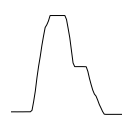

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201091630-1min.png
30 of 290 complete ........................



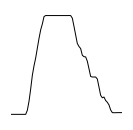

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201091935-1min.png
31 of 290 complete ........................



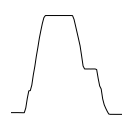

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201100718-1min.png
32 of 290 complete ........................



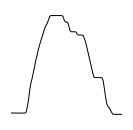

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201101153-1min.png
33 of 290 complete ........................



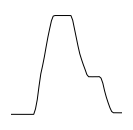

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201101447-1min.png
34 of 290 complete ........................



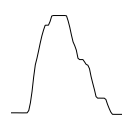

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201101628-1min.png
35 of 290 complete ........................



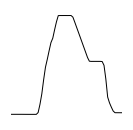

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201101850-1min.png
36 of 290 complete ........................



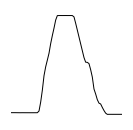

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201110719-1min.png
37 of 290 complete ........................



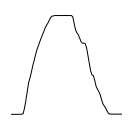

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201111202-1min.png
38 of 290 complete ........................



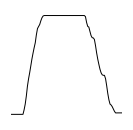

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201111508-1min.png
39 of 290 complete ........................



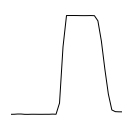

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201120951-1min.png
40 of 290 complete ........................



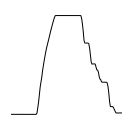

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201130552-1min.png
41 of 290 complete ........................



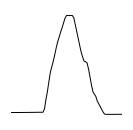

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201130841-1min.png
42 of 290 complete ........................



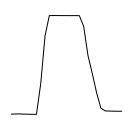

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201131033-1min.png
43 of 290 complete ........................



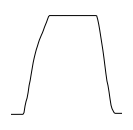

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201131744-1min.png
44 of 290 complete ........................



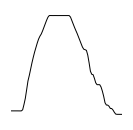

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201140505-1min.png
45 of 290 complete ........................



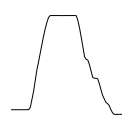

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201141015-1min.png
46 of 290 complete ........................



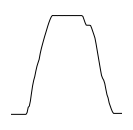

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201141724-1min.png
47 of 290 complete ........................



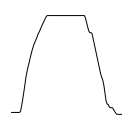

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201141928-1min.png
48 of 290 complete ........................



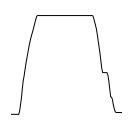

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201150336-1min.png
49 of 290 complete ........................



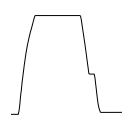

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201150930-1min.png
50 of 290 complete ........................



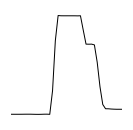

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201151704-1min.png
51 of 290 complete ........................



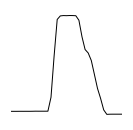

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201160608-1min.png
52 of 290 complete ........................



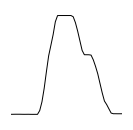

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201161248-1min.png
53 of 290 complete ........................



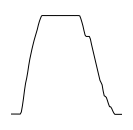

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201170559-1min.png
54 of 290 complete ........................



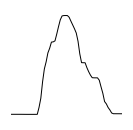

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201180640-1min.png
55 of 290 complete ........................



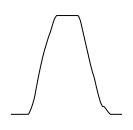

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201181304-1min.png
56 of 290 complete ........................



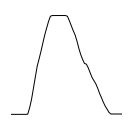

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201190346-1min.png
57 of 290 complete ........................



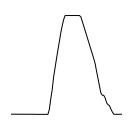

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201190606-1min.png
58 of 290 complete ........................



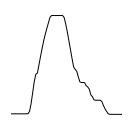

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201190801-1min.png
59 of 290 complete ........................



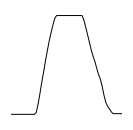

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201210904-1min.png
60 of 290 complete ........................



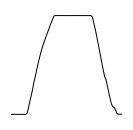

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201211346-1min.png
61 of 290 complete ........................



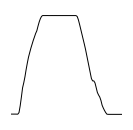

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201211559-1min.png
62 of 290 complete ........................



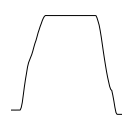

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201220540-1min.png
63 of 290 complete ........................



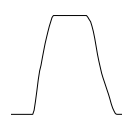

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201220843-1min.png
64 of 290 complete ........................



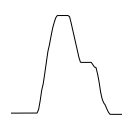

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201230839-1min.png
65 of 290 complete ........................



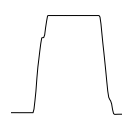

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201231123-1min.png
66 of 290 complete ........................



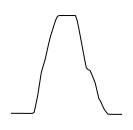

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201240658-1min.png
67 of 290 complete ........................



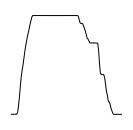

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201260946-1min.png
68 of 290 complete ........................



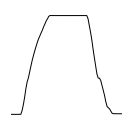

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201261351-1min.png
69 of 290 complete ........................



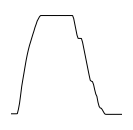

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201261613-1min.png
70 of 290 complete ........................



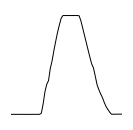

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201270605-1min.png
71 of 290 complete ........................



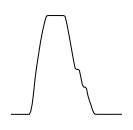

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201270759-1min.png
72 of 290 complete ........................



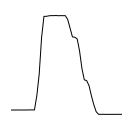

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201271117-1min.png
73 of 290 complete ........................



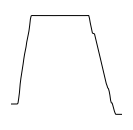

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201281551-1min.png
74 of 290 complete ........................



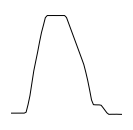

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201282051-1min.png
75 of 290 complete ........................



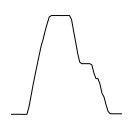

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201290347-1min.png
76 of 290 complete ........................



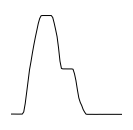

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201290842-1min.png
77 of 290 complete ........................



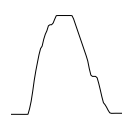

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201291828-1min.png
78 of 290 complete ........................



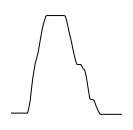

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201300721-1min.png
79 of 290 complete ........................



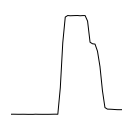

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201300952-1min.png
80 of 290 complete ........................



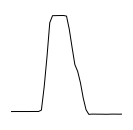

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201301118-1min.png
81 of 290 complete ........................



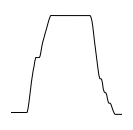

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201301628-1min.png
82 of 290 complete ........................



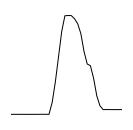

/content/gdrive/My Drive/dashlink/Test/png1/non/687200201301941-1min.png
83 of 290 complete ........................



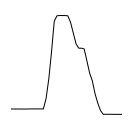

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202010536-1min.png
84 of 290 complete ........................



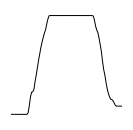

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202010807-1min.png
85 of 290 complete ........................



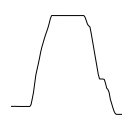

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202011103-1min.png
86 of 290 complete ........................



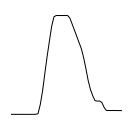

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202011352-1min.png
87 of 290 complete ........................



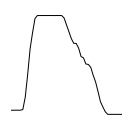

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202011515-1min.png
88 of 290 complete ........................



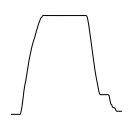

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202011956-1min.png
89 of 290 complete ........................



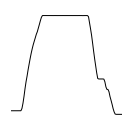

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202020549-1min.png
90 of 290 complete ........................



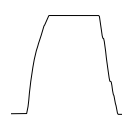

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202021211-1min.png
91 of 290 complete ........................



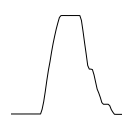

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202021529-1min.png
92 of 290 complete ........................



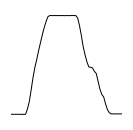

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202021703-1min.png
93 of 290 complete ........................



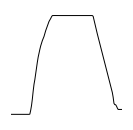

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202021952-1min.png
94 of 290 complete ........................



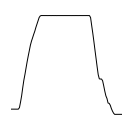

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202030548-1min.png
95 of 290 complete ........................



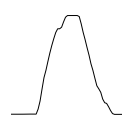

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202030901-1min.png
96 of 290 complete ........................



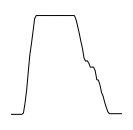

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202031038-1min.png
97 of 290 complete ........................



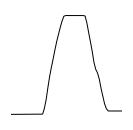

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202031302-1min.png
98 of 290 complete ........................



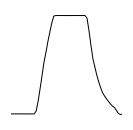

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202040752-1min.png
99 of 290 complete ........................



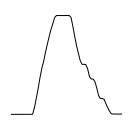

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202040948-1min.png
100 of 290 complete ........................



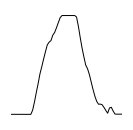

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202041135-1min.png
101 of 290 complete ........................



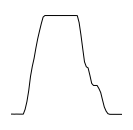

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202041316-1min.png
102 of 290 complete ........................



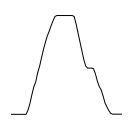

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202041529-1min.png
103 of 290 complete ........................



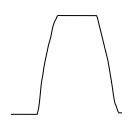

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202061155-1min.png
104 of 290 complete ........................



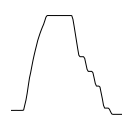

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202061438-1min.png
105 of 290 complete ........................



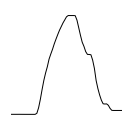

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202070802-1min.png
106 of 290 complete ........................



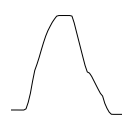

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202071011-1min.png
107 of 290 complete ........................



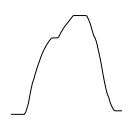

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202071302-1min.png
108 of 290 complete ........................



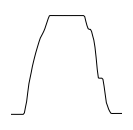

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202071826-1min.png
109 of 290 complete ........................



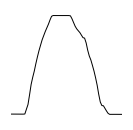

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202081922-1min.png
110 of 290 complete ........................



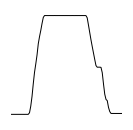

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202091310-1min.png
111 of 290 complete ........................



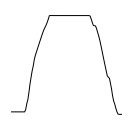

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202091826-1min.png
112 of 290 complete ........................



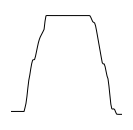

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202100643-1min.png
113 of 290 complete ........................



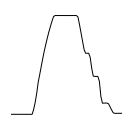

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202101252-1min.png
114 of 290 complete ........................



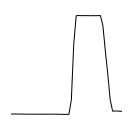

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202101759-1min.png
115 of 290 complete ........................



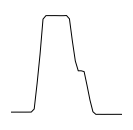

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202110618-1min.png
116 of 290 complete ........................



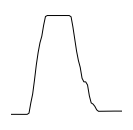

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202110804-1min.png
117 of 290 complete ........................



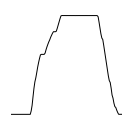

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202111254-1min.png
118 of 290 complete ........................



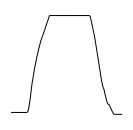

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202111843-1min.png
119 of 290 complete ........................



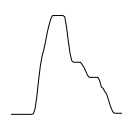

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202120641-1min.png
120 of 290 complete ........................



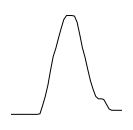

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202121403-1min.png
121 of 290 complete ........................



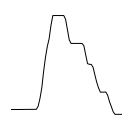

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202121514-1min.png
122 of 290 complete ........................



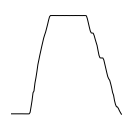

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202121737-1min.png
123 of 290 complete ........................



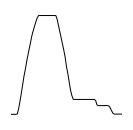

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202131623-1min.png
124 of 290 complete ........................



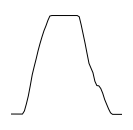

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202131823-1min.png
125 of 290 complete ........................



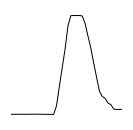

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202131953-1min.png
126 of 290 complete ........................



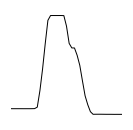

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202140537-1min.png
127 of 290 complete ........................



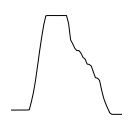

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202140934-1min.png
128 of 290 complete ........................



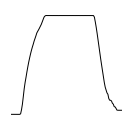

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202141954-1min.png
129 of 290 complete ........................



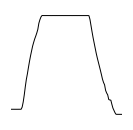

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202150552-1min.png
130 of 290 complete ........................



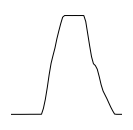

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202150903-1min.png
131 of 290 complete ........................



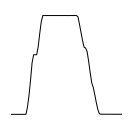

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202151039-1min.png
132 of 290 complete ........................



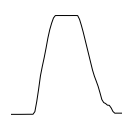

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202151247-1min.png
133 of 290 complete ........................



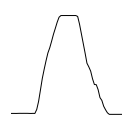

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202151440-1min.png
134 of 290 complete ........................



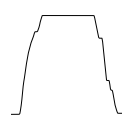

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202161201-1min.png
135 of 290 complete ........................



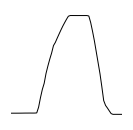

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202161530-1min.png
136 of 290 complete ........................



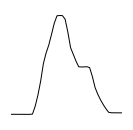

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202170527-1min.png
137 of 290 complete ........................



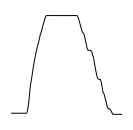

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202170646-1min.png
138 of 290 complete ........................



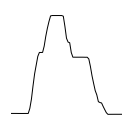

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202170913-1min.png
139 of 290 complete ........................



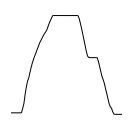

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202171113-1min.png
140 of 290 complete ........................



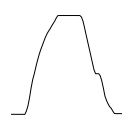

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202171714-1min.png
141 of 290 complete ........................



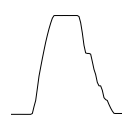

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202180755-1min.png
142 of 290 complete ........................



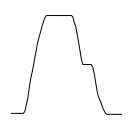

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202181117-1min.png
143 of 290 complete ........................



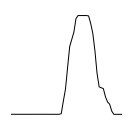

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202181308-1min.png
144 of 290 complete ........................



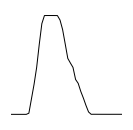

/content/gdrive/My Drive/dashlink/Test/png1/non/687200202181433-1min.png
145 of 290 complete ........................



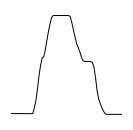

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203050430-1min.png
146 of 290 complete ........................



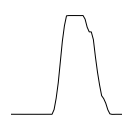

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203051306-1min.png
147 of 290 complete ........................



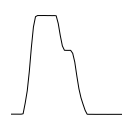

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203051432-1min.png
148 of 290 complete ........................



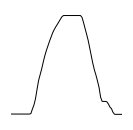

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203051629-1min.png
149 of 290 complete ........................



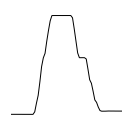

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203060803-1min.png
150 of 290 complete ........................



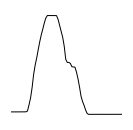

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203061022-1min.png
151 of 290 complete ........................



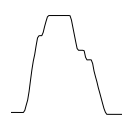

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203061433-1min.png
152 of 290 complete ........................



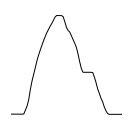

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203070431-1min.png
153 of 290 complete ........................



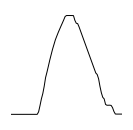

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203070650-1min.png
154 of 290 complete ........................



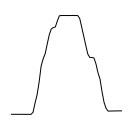

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203071107-1min.png
155 of 290 complete ........................



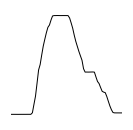

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203071439-1min.png
156 of 290 complete ........................



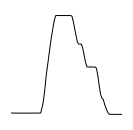

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203071626-1min.png
157 of 290 complete ........................



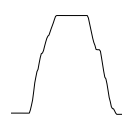

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203071844-1min.png
158 of 290 complete ........................



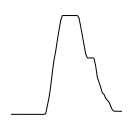

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203081110-1min.png
159 of 290 complete ........................



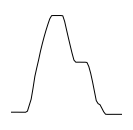

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203081243-1min.png
160 of 290 complete ........................



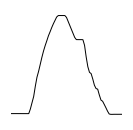

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203081442-1min.png
161 of 290 complete ........................



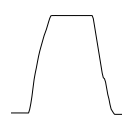

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203081850-1min.png
162 of 290 complete ........................



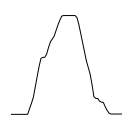

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203090928-1min.png
163 of 290 complete ........................



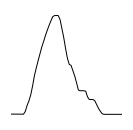

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203091104-1min.png
164 of 290 complete ........................



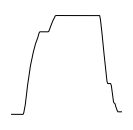

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203091258-1min.png
165 of 290 complete ........................



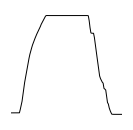

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203091633-1min.png
166 of 290 complete ........................



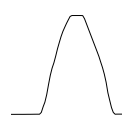

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203092042-1min.png
167 of 290 complete ........................



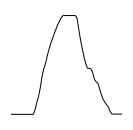

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203100803-1min.png
168 of 290 complete ........................



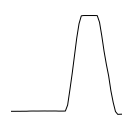

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203100956-1min.png
169 of 290 complete ........................



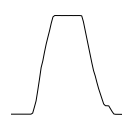

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203110754-1min.png
170 of 290 complete ........................



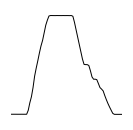

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203110949-1min.png
171 of 290 complete ........................



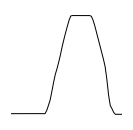

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203111135-1min.png
172 of 290 complete ........................



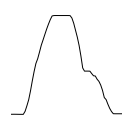

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203111320-1min.png
173 of 290 complete ........................



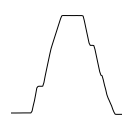

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203111540-1min.png
174 of 290 complete ........................



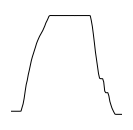

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203120545-1min.png
175 of 290 complete ........................



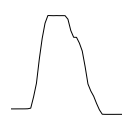

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203121659-1min.png
176 of 290 complete ........................



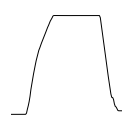

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203121959-1min.png
177 of 290 complete ........................



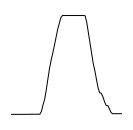

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203130915-1min.png
178 of 290 complete ........................



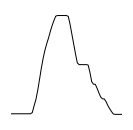

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203131045-1min.png
179 of 290 complete ........................



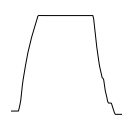

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203140535-1min.png
180 of 290 complete ........................



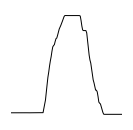

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203141535-1min.png
181 of 290 complete ........................



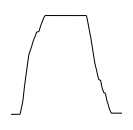

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203141820-1min.png
182 of 290 complete ........................



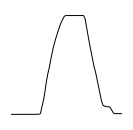

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203142127-1min.png
183 of 290 complete ........................



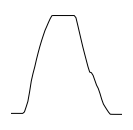

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203150516-1min.png
184 of 290 complete ........................



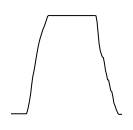

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203151024-1min.png
185 of 290 complete ........................



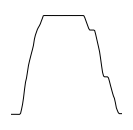

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203151241-1min.png
186 of 290 complete ........................



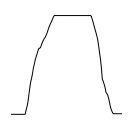

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203160634-1min.png
187 of 290 complete ........................



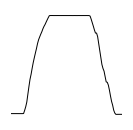

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203160929-1min.png
188 of 290 complete ........................



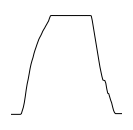

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203161151-1min.png
189 of 290 complete ........................



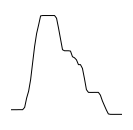

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203161527-1min.png
190 of 290 complete ........................



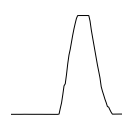

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203161750-1min.png
191 of 290 complete ........................



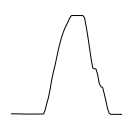

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203170603-1min.png
192 of 290 complete ........................



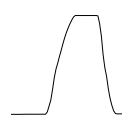

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203181554-1min.png
193 of 290 complete ........................



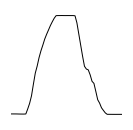

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203181716-1min.png
194 of 290 complete ........................



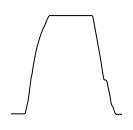

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203190920-1min.png
195 of 290 complete ........................



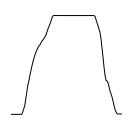

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203191152-1min.png
196 of 290 complete ........................



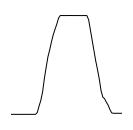

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203191524-1min.png
197 of 290 complete ........................



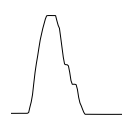

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203191702-1min.png
198 of 290 complete ........................



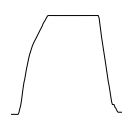

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203191944-1min.png
199 of 290 complete ........................



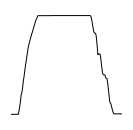

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203201004-1min.png
200 of 290 complete ........................



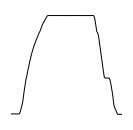

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203201713-1min.png
201 of 290 complete ........................



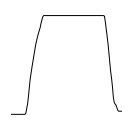

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203210750-1min.png
202 of 290 complete ........................



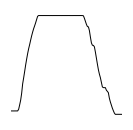

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203211026-1min.png
203 of 290 complete ........................



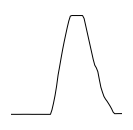

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203211750-1min.png
204 of 290 complete ........................



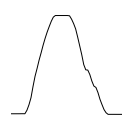

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203220533-1min.png
205 of 290 complete ........................



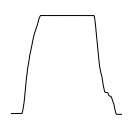

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203231301-1min.png
206 of 290 complete ........................



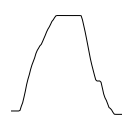

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203241032-1min.png
207 of 290 complete ........................



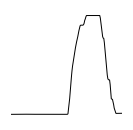

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203241237-1min.png
208 of 290 complete ........................



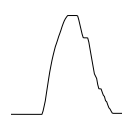

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203250606-1min.png
209 of 290 complete ........................



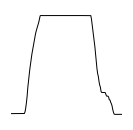

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203261300-1min.png
210 of 290 complete ........................



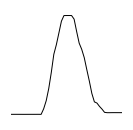

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203261945-1min.png
211 of 290 complete ........................



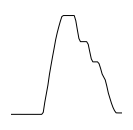

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203271859-1min.png
212 of 290 complete ........................



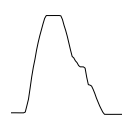

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203280437-1min.png
213 of 290 complete ........................



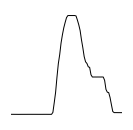

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203280646-1min.png
214 of 290 complete ........................



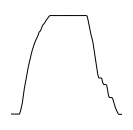

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203280952-1min.png
215 of 290 complete ........................



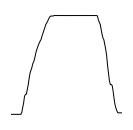

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203281223-1min.png
216 of 290 complete ........................



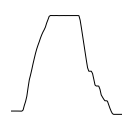

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203281449-1min.png
217 of 290 complete ........................



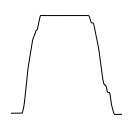

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203281723-1min.png
218 of 290 complete ........................



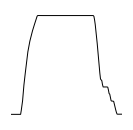

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203290437-1min.png
219 of 290 complete ........................



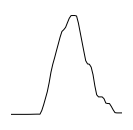

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203290814-1min.png
220 of 290 complete ........................



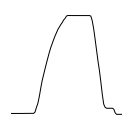

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203291407-1min.png
221 of 290 complete ........................



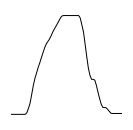

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203291540-1min.png
222 of 290 complete ........................



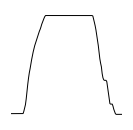

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203291722-1min.png
223 of 290 complete ........................



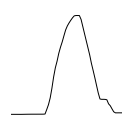

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203300818-1min.png
224 of 290 complete ........................



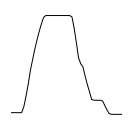

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203301031-1min.png
225 of 290 complete ........................



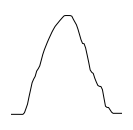

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203310506-1min.png
226 of 290 complete ........................



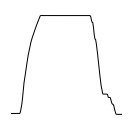

/content/gdrive/My Drive/dashlink/Test/png1/non/687200203310729-1min.png
227 of 290 complete ........................



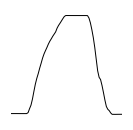

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204010817-1min.png
228 of 290 complete ........................



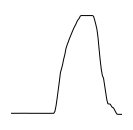

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204011305-1min.png
229 of 290 complete ........................



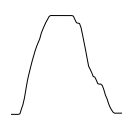

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204011509-1min.png
230 of 290 complete ........................



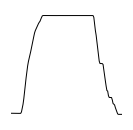

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204011718-1min.png
231 of 290 complete ........................



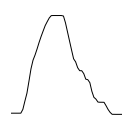

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204021029-1min.png
232 of 290 complete ........................



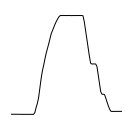

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204021241-1min.png
233 of 290 complete ........................



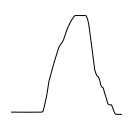

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204021439-1min.png
234 of 290 complete ........................



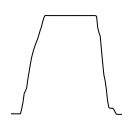

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204030647-1min.png
235 of 290 complete ........................



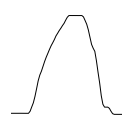

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204231253-1min.png
236 of 290 complete ........................



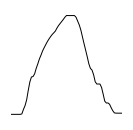

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204231441-1min.png
237 of 290 complete ........................



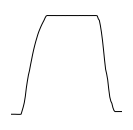

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204231658-1min.png
238 of 290 complete ........................



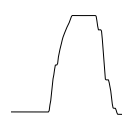

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204240520-1min.png
239 of 290 complete ........................



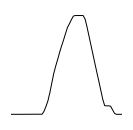

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204240828-1min.png
240 of 290 complete ........................



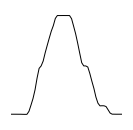

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204241039-1min.png
241 of 290 complete ........................



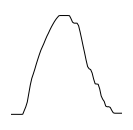

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204241446-1min.png
242 of 290 complete ........................



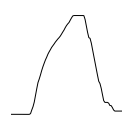

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204241739-1min.png
243 of 290 complete ........................



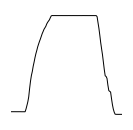

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204250732-1min.png
244 of 290 complete ........................



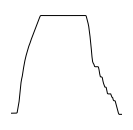

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204251748-1min.png
245 of 290 complete ........................



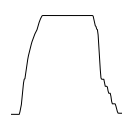

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204260433-1min.png
246 of 290 complete ........................



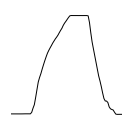

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204260813-1min.png
247 of 290 complete ........................



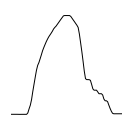

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204261004-1min.png
248 of 290 complete ........................



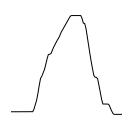

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204261445-1min.png
249 of 290 complete ........................



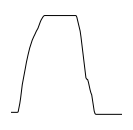

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204270555-1min.png
250 of 290 complete ........................



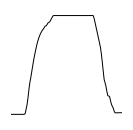

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204270903-1min.png
251 of 290 complete ........................



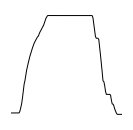

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204271155-1min.png
252 of 290 complete ........................



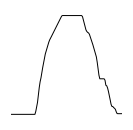

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204271543-1min.png
253 of 290 complete ........................



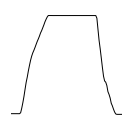

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204280516-1min.png
254 of 290 complete ........................



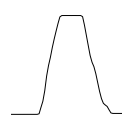

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204280753-1min.png
255 of 290 complete ........................



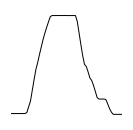

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204280932-1min.png
256 of 290 complete ........................



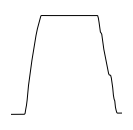

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204281108-1min.png
257 of 290 complete ........................



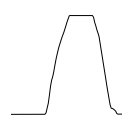

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204281733-1min.png
258 of 290 complete ........................



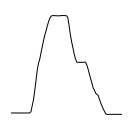

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204291033-1min.png
259 of 290 complete ........................



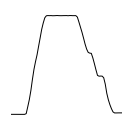

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204291242-1min.png
260 of 290 complete ........................



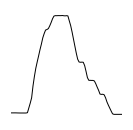

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204291434-1min.png
261 of 290 complete ........................



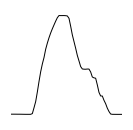

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204300537-1min.png
262 of 290 complete ........................



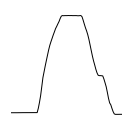

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204300750-1min.png
263 of 290 complete ........................



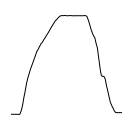

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204301021-1min.png
264 of 290 complete ........................



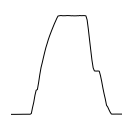

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204301215-1min.png
265 of 290 complete ........................



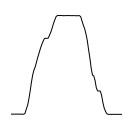

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204301425-1min.png
266 of 290 complete ........................



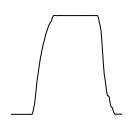

/content/gdrive/My Drive/dashlink/Test/png1/non/687200204301736-1min.png
267 of 290 complete ........................



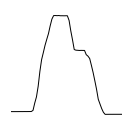

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205010435-1min.png
268 of 290 complete ........................



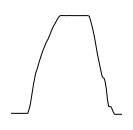

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205011119-1min.png
269 of 290 complete ........................



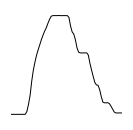

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205020752-1min.png
270 of 290 complete ........................



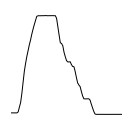

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205021036-1min.png
271 of 290 complete ........................



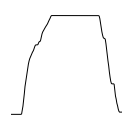

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205021305-1min.png
272 of 290 complete ........................



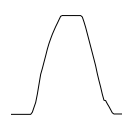

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205031300-1min.png
273 of 290 complete ........................



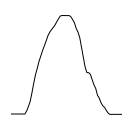

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205031503-1min.png
274 of 290 complete ........................



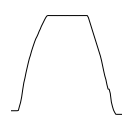

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205041036-1min.png
275 of 290 complete ........................



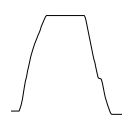

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205050529-1min.png
276 of 290 complete ........................



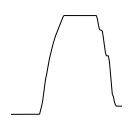

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205050832-1min.png
277 of 290 complete ........................



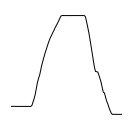

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205051058-1min.png
278 of 290 complete ........................



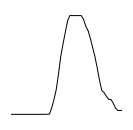

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205051401-1min.png
279 of 290 complete ........................



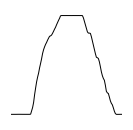

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205051730-1min.png
280 of 290 complete ........................



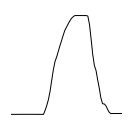

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205061625-1min.png
281 of 290 complete ........................



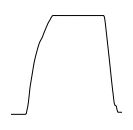

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205062047-1min.png
282 of 290 complete ........................



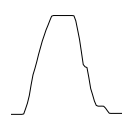

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205071523-1min.png
283 of 290 complete ........................



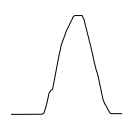

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205081531-1min.png
284 of 290 complete ........................



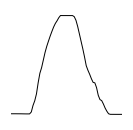

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205081706-1min.png
285 of 290 complete ........................



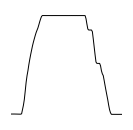

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205090952-1min.png
286 of 290 complete ........................



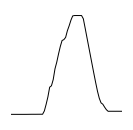

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205091308-1min.png
287 of 290 complete ........................



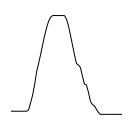

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205091449-1min.png
288 of 290 complete ........................



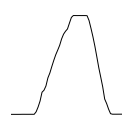

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205100604-1min.png
289 of 290 complete ........................



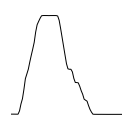

/content/gdrive/My Drive/dashlink/Test/png1/non/687200205100802-1min.png
290 of 290 complete ........................



In [26]:
# inspect non-useful profiles
allFiles = glob.glob(str(infpath/outpath/'non'/'*.png'))
n = len(allFiles)
print(f'TOTAL FILES TO SHOW IN non FOLDER: {n}\n')
for i,file_ in enumerate(allFiles):
    #if i==5: break
        
    display(Image(filename=file_))
    print(file_)
    
    print(f'{i+1} of {n} complete ........................\n')